# Declaration of Originality

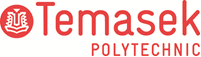

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :
* Tutorial Group                :  
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# 1. Business Understanding
Goal: To predict whether a student is likely to experience depression.

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
## Read *.csv file into pandas DataFrame
df = pd.read_csv('Student_Depression_Dataset.csv')
df = df.drop(columns=['id', 'City'])
df

,Gender,Age,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,Male,27.0,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,Male,31.0,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,Female,18.0,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


## 2.2 Summary Statistics

In [3]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   Profession                             27901 non-null  object 
 3   Academic Pressure                      27901 non-null  float64
 4   Work Pressure                          27901 non-null  float64
 5   CGPA                                   27901 non-null  float64
 6   Study Satisfaction                     27901 non-null  float64
 7   Job Satisfaction                       27901 non-null  float64
 8   Sleep Duration                         27901 non-null  object 
 9   Dietary Habits                         27901 non-null  object 
 10  Degree                                 27901 non-null  object 
 11  Ha

In [4]:
## Check for missing data
df.isna().sum()

Gender                                   0
Age                                      0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [5]:
## Describe data distribution
df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

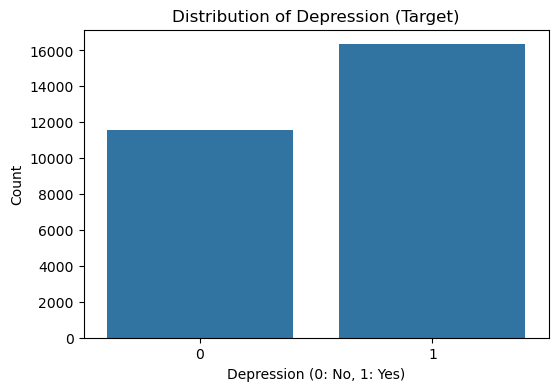

In [6]:
## Understanding distribution of target
plt.figure(figsize=(6, 4))
sns.countplot(x='Depression', data=df)
plt.title('Distribution of Depression (Target)')
plt.xlabel('Depression (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()



### Explaination:

The countplot shows that the number of students that are depressed is higher than those who are labelled not depressed. This shows that the dataset is slightly imbalanced. This plot is important because when one class appears more frequently than the other, the model may become biased towards predicting the majority class, which can lead to misleading performance

### 2.3.1.2 Understanding distribution of features

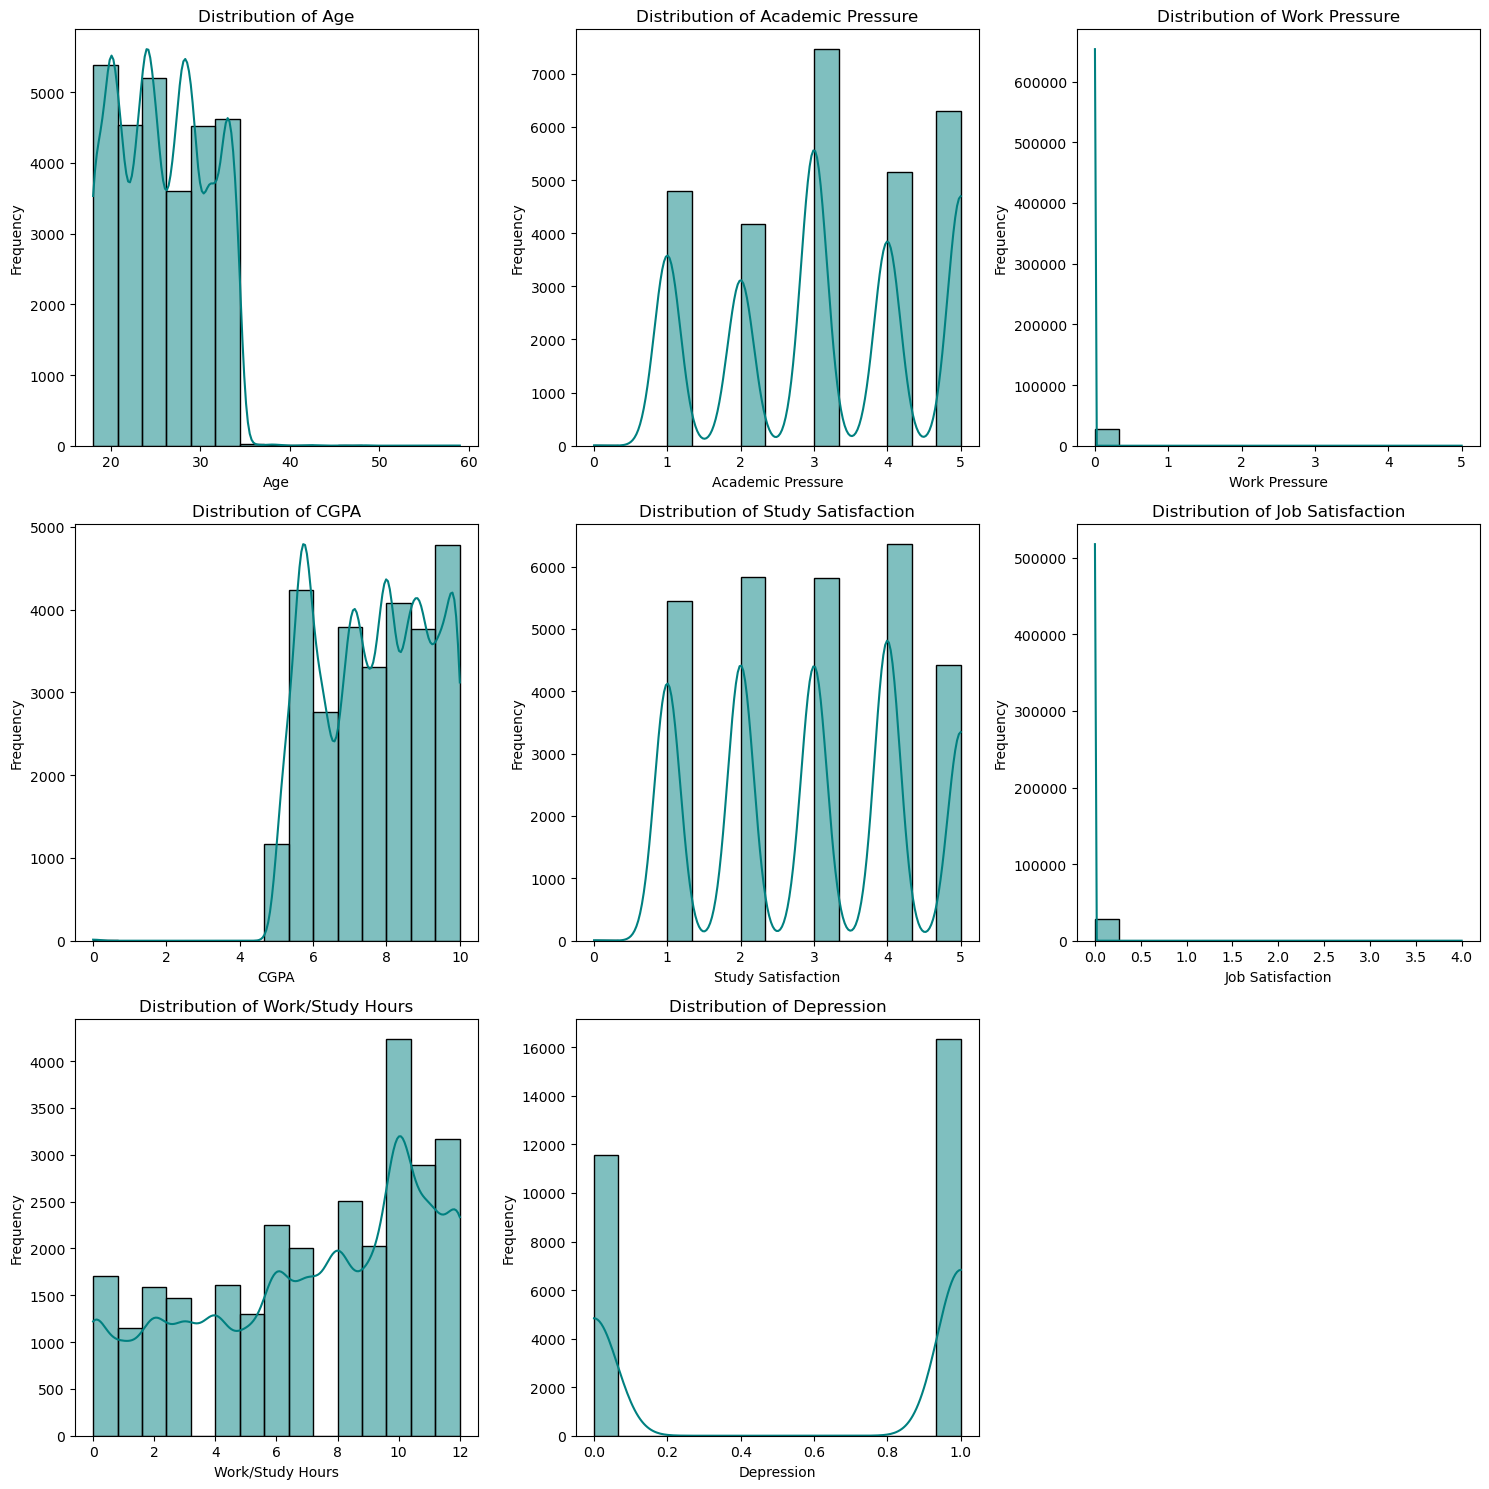

In [7]:
## Understanding distribution of features
numeric_cols = df.select_dtypes(include=['number']).columns

num_plots = len(numeric_cols)
rows = (num_plots // 3) + 1  
plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=15, color='teal')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### 2.3.2 Understanding relationship between variables

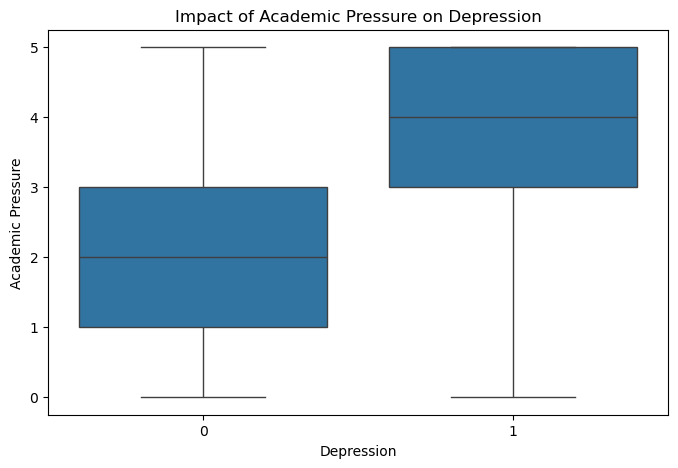

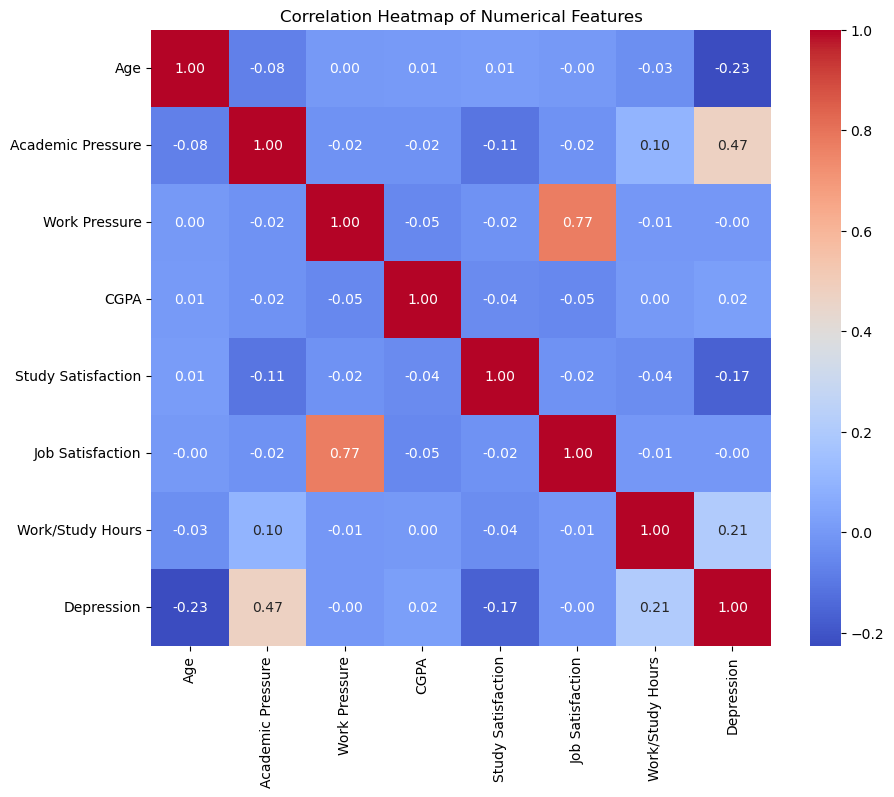

In [8]:
## Understanding relationship between variables
plt.figure(figsize=(8, 5))
sns.boxplot(x='Depression', y='Academic Pressure', data=df)
plt.title('Impact of Academic Pressure on Depression')
plt.show()

numeric_cols = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 3. Data Preparation

## 3.1 Data Cleaning

In [9]:
## Clean data
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded.dtypes.value_counts())

bool       55
float64     7
int64       1
Name: count, dtype: int64


## 3.2 Train-Test Split

In [10]:
## Split data into train set and test set
col_y = 'Depression'
x = df_encoded.drop(columns=[col_y])
y = df_encoded[col_y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# 4. Modelling

### 4.2 Train Model

### Logistic Regression

In [11]:
## Initialise and train model
logr = LogisticRegression(max_iter=10000)
logr.fit(x_train, y_train)
y_pred = logr.predict(x_test)

### Random Forest

In [12]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

### Gradient Boosting

In [13]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(x_train, y_train)
gb_pred = gb_model.predict(x_test)

### Decision Tree

In [14]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)

# 5. Model Evaluation

In [15]:
## Evaluate model
models = {
    "Logistic Regression": y_pred,
    "Random Forest": rf_pred,
    "Gradient Boosting": gb_pred,
    "Decision Tree": dt_pred
}

results = []

for name, preds in models.items():
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds),
        "Recall": recall_score(y_test, preds),
        "F1-Score": f1_score(y_test, preds)
    })

evaluation_df = pd.DataFrame(results)
print(evaluation_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.847927   0.858073  0.886962  0.872279
1        Random Forest  0.839326   0.849587  0.881657  0.865325
2    Gradient Boosting  0.846494   0.855067  0.888390  0.871410
3        Decision Tree  0.776849   0.808671  0.810651  0.809660


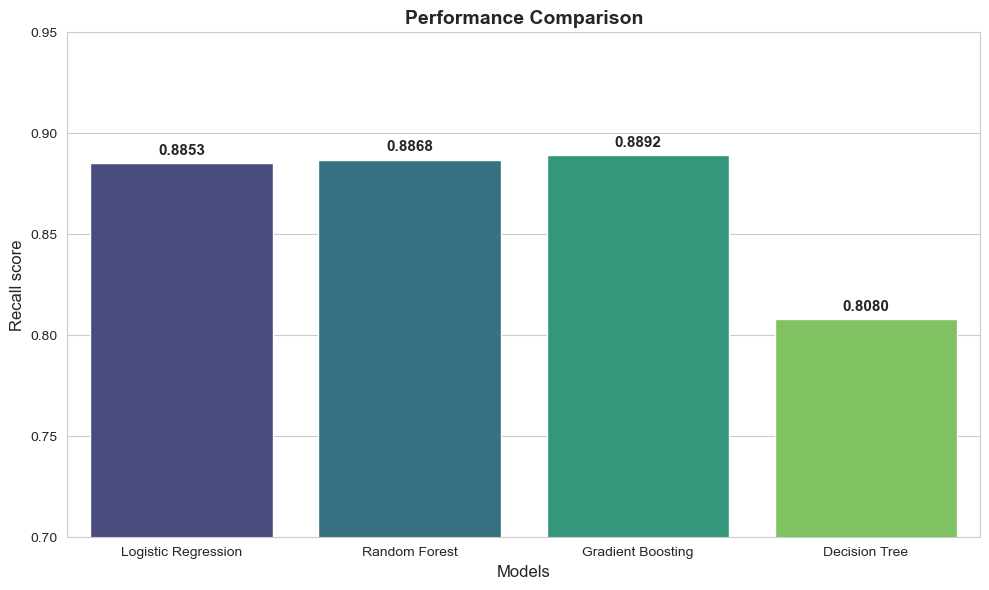

In [16]:
# Create a performance comparison dataframe
performance_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree'],
    'Accuracy': [0.8460, 0.8402, 0.8464, 0.7763],
    'Recall': [0.8853, 0.8868, 0.8892, 0.8080]
}
df_perf = pd.DataFrame(performance_data)

# Setting the visual style to match your preference
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

ax = sns.barplot(x='Model', y='Recall', data=df_perf, palette='viridis', hue='Model')

# Adding data labels on top of each bar for high precision
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=11, fontweight='bold')

plt.title('Performance Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Recall score', fontsize=12)
plt.ylim(0.7, 0.95) 

plt.tight_layout()
plt.show()

## Iterative model development


### Feature engineering

In [17]:
## Further feature engineering / feature selection
cols_to_convert = ['Academic Pressure', 'Work/Study Hours', 'Study Satisfaction', 'Financial Stress']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check for missing values created by the conversion and drop them
df = df.dropna(subset=cols_to_convert)
df_final = df.copy()

# Add your features to df_final instead of df
df_final['Burnout_Index'] = (df_final['Academic Pressure'] * df_final['Work/Study Hours']) / (df_final['Study Satisfaction'] + 1)
df_final['Total_Stress'] = df_final['Financial Stress'] * df_final['Academic Pressure']

In [18]:
df_encoded = pd.get_dummies(df, drop_first=True)

col_y = 'Depression'
x = df_encoded.drop(columns=[col_y])
y = df_encoded[col_y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

gb_model_final = GradientBoostingClassifier(random_state=42)
gb_model_final.fit(x_train, y_train)

# Predict on the new test set
y_pred_final = gb_model_final.predict(x_test)

# Compare results
print(f"New Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"New Recall: {recall_score(y_test, y_pred_final):.4f}")

New Accuracy: 0.8491
New Recall: 0.8894


<Figure size 600x600 with 0 Axes>

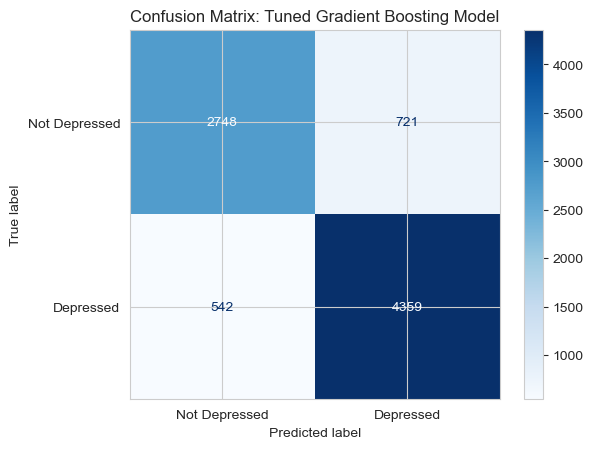

In [19]:
cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Depressed', 'Depressed'])

plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix: Tuned Gradient Boosting Model')
plt.show()

### Feature selection

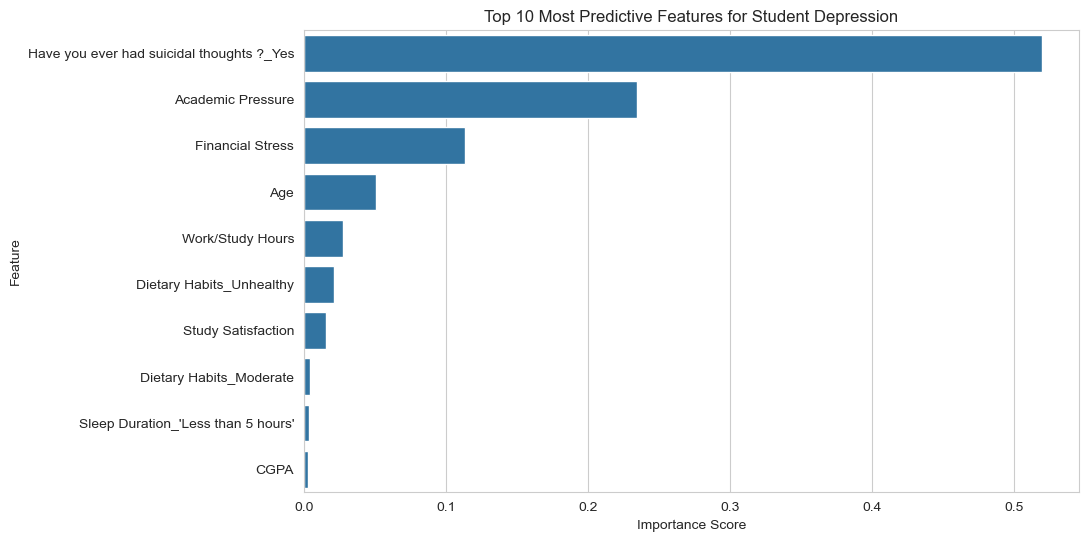

In [20]:
# Get feature importances from your trained Gradient Boosting model
importances = gb_model_final.feature_importances_
feature_names = x_train.columns

# 2. Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 3. Visualize the Top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Most Predictive Features for Student Depression')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

### Hyperparameter tuning (Randomised Search)

In [ ]:
param_dist = {
    'n_estimators': [200, 300, 400], 
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=15, 
    cv=3,
    scoring='recall', 
    random_state=42,
    verbose=1
)

random_search.fit(x_train, y_train)

# Final Evaluation
best_model = random_search.best_estimator_
y_pred_tuned = best_model.predict(x_test)

print(f"Final Tuned Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Final Tuned Recall: {recall_score(y_test, y_pred_tuned):.4f}")

Fitting 3 folds for each of 15 candidates, totalling 45 fits


In [ ]:
joblib.dump(best_model, 'depression_model.pkl')
print("Model saved successfully!")

Model saved successfully!
